# 2025.2.18 NKTCL_01_Basic

In [75]:
import anndata as ad
import matplotlib.pyplot as plt
import muon as mu
import pandas as pd
import scanpy as sc
import scirpy as ir
import numpy as np
import os
import seaborn as sns
from scipy.sparse import csc_matrix, csr_matrix

In [76]:
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter, PercentFormatter
ir.__version__
figPath = "NKTCL-figure-2.18"
plt.rcParams["font.sans-serif"] = ["Arial"]
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 14

In [ ]:
VDJprefix = "/data/NKTCL/NKTCL_Multi/NKTCL-vdj/"
VDJFiles = os.listdir(VDJprefix)
VDJFiles.sort()

['NK10_0',
 'NK11_0',
 'NK11_1',
 'NK1_0',
 'NK2_0',
 'NK3_0',
 'NK4_0',
 'NK5_0',
 'NK5_1',
 'NK6_0',
 'NK6_1',
 'NK7_0',
 'NK7_1',
 'NK8_0',
 'NK8_1',
 'NK9_0',
 'PB9_0',
 'RR6_0']

### Read and merge TCR and BCR

In [176]:
# suffix
BCRsuffix = "/vdj_b/filtered_contig_annotations.csv"
TCRsuffix = "/vdj_t/filtered_contig_annotations.csv"

# bcr
nktcl_bcr = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[0]}{BCRsuffix}", filtered=True)
nktcl_bcr.obs_names = [f"{s}-{VDJFiles[0]}" for s in nktcl_bcr.obs_names]
for i in range(1, len(VDJFiles)):
  nktcl_ir = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[i]}{BCRsuffix}", filtered=True)
  nktcl_ir.obs_names = [f"{s}-{VDJFiles[i]}" for s in nktcl_ir.obs_names]
  nktcl_bcr = ir.pp.merge_airr(nktcl_bcr, nktcl_ir)

# tcr
nktcl_tcr = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[0]}{TCRsuffix}", filtered=True)
nktcl_tcr.obs_names = [f"{s}-{VDJFiles[0]}" for s in nktcl_tcr.obs_names]
for i in range(1, len(VDJFiles)):
  nktcl_ir = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[i]}{TCRsuffix}", filtered=True)
  nktcl_ir.obs_names = [f"{s}-{VDJFiles[i]}" for s in nktcl_ir.obs_names]
  nktcl_tcr = ir.pp.merge_airr(nktcl_tcr, nktcl_ir)
nktcl_ir = ir.pp.merge_airr(nktcl_bcr, nktcl_tcr)
nktcl_ir

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 60443 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

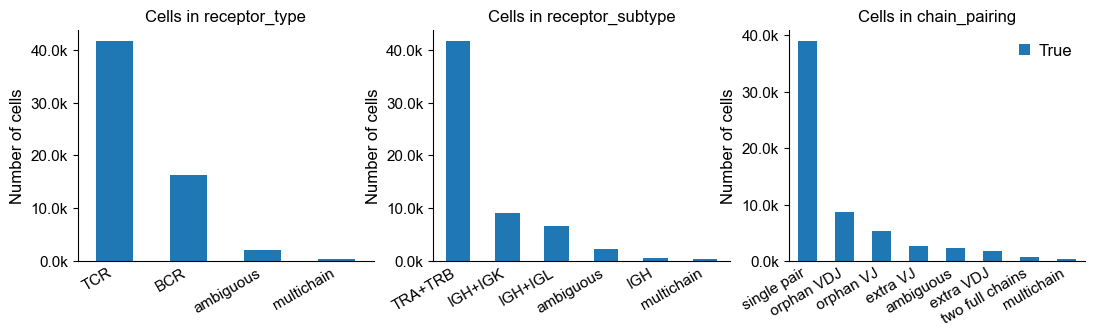

In [178]:
ir.pp.index_chains(nktcl_ir)
ir.tl.chain_qc(nktcl_ir)
# abundance of TCR,BCR targeting molecular_type
def ks(x, pos):
    return '%1.1fk' % (x*1e-3)
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["receptor_type", "receptor_subtype", 'chain_pairing']):
  ir.pl.group_abundance(nktcl_ir, groupby=g, 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[0]),
                                   "xlab": '',
                                   "title_fontsize":12, 
                                   "label_fontsize":12, 
                                   "tick_fontsize":11,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[2].legend(fontsize=12,
      frameon=False, handletextpad=0.5, loc="best",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/EBV-nktcl-ir-stat.svg", bbox_inches='tight')

In [19]:
from collections import Counter
Counter(nktcl_ir.obs['receptor_type'])

Counter({'TCR': 39260, 'BCR': 16253, 'ambiguous': 2071, 'multichain': 332})

Load preprocessed NKTCL-ir.h5ad is available

In [ ]:
nktcl_ir = sc.read_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-ir.h5ad")

Save IR to NKTCL-ir.h5ad

In [187]:
nktcl_ir.write_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-ir-EBV.h5ad")

### Read and merge Counts

In [98]:
# 导入表达矩阵
def input_adata(sample):
    adata = sc.read_10x_mtx(sample)
    fea = pd.read_csv(sample+'/features.tsv.gz', header=None, sep='\t')
    fea.columns = ['ID', 'name', 'type']
    adata.var = fea
    adata.var_names_make_unique()
    return adata

# 将所有矩阵合并
def concat_adata(adatas):
    
    # 进行数据合并
    adata_concat = adatas[0].concatenate(adatas[1:], batch_categories=sampleNames)
    adata_concat
    return adata_concat
    
# 查看所有细胞中线粒体基因的含量
def show_mito(adata):
    mito_genes = adata.var_names.str.startswith('MT-')
    # the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
    adata.obs['mt_frac'] = np.sum(
        adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
    plt.hist(adata.obs['mt_frac'])
    plt.savefig(f'{figPath}/mt_fraction.svg')
    return adata
    
# 查看基因表达情况
def show_expr(adata):
    sc.pp.calculate_qc_metrics(adata, percent_top=None, inplace=True)
    fig, axs = plt.subplots(1, 2, figsize=(15, 4))
    fig.suptitle('Covariates for filtering')
    sns.distplot(adata.obs['total_counts'], kde=False, ax=axs[0])
    sns.distplot(adata.obs['total_counts'][adata.obs['total_counts'] < 10000], kde=False, bins=40, ax=axs[1])
    fig.savefig(f'{figPath}/Covariates.svg')
    return adata
    
# 预处理
def pp(adata, do_harmony=True):
    # 过滤低表达的基因
    sc.pp.filter_cells(adata, min_genes=5)  # 过滤一个细胞中表达少于五个基因的细胞样本 
    sc.pp.filter_genes(adata, min_cells=5)  # 过滤在少于五个细胞中表达的基因
    sc.pp.filter_cells(adata, min_counts=30)   # 过滤每个细胞中计数少于29个的细胞样本 

    # 过滤线粒体核糖体基因
    rp_genes = adata.var_names.str.startswith('RP')
    mt_genes = adata.var_names.str.startswith('MT-')
    adata = adata[:, ~(rp_genes + mt_genes)]
    
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    
    # 通过主成分分析降低数据维度
    adata = adata[adata.obs['mt_frac'] < 0.2]
    return adata

In [78]:
# RNAprefix = '/data/NKTCL/NKTCL_Multi/NKTCL-scRNA/'
RNAprefix = '/data/NKTCL/NKTCL_Multi/NKTCL-scRNA-EBV/'
RNAFiles = os.listdir(RNAprefix)
RNAFiles.sort()

In [ ]:
adatas = []
for i in range(len(RNAFiles)):
    adata = input_adata(f"{RNAprefix}{RNAFiles[i]}")
    adatas.append(adata)
    
adata_concat = adatas[0].concatenate(adatas[1:], batch_categories=RNAFiles)
adata_concat
del adatas

/tmp/ipykernel_3264984/987321752.py:6: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_raw = adatas[0].concatenate(adatas[1:], batch_categories=RNAFiles)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [ ]:
adatas = []
for i in range(len(RNAFiles)):
    adata = input_adata(f"{RNAprefix}{RNAFiles[i]}")
    adatas.append(adata)
    
adata_concat = adatas[0].concatenate(adatas[1:], batch_categories=RNAFiles)
adata_concat
del adatas

/tmp/ipykernel_3264984/3217976360.py:6: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adatas[0].concatenate(adatas[1:], batch_categories=RNAFiles)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [99]:
adata_concat

AnnData object with n_obs × n_vars = 170213 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden-1_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [80]:
fea = pd.read_csv('/data/NKTCL/NKTCL_Multi/NKTCL-scRNA-EBV/NK1_0/features.tsv.gz', header=None, sep='\t')
adata_concat.var = fea
fea.columns = ['ID', 'name', 'type']
adata_concat.var_names = fea['name']

In [ ]:
fea = pd.read_csv('/data/NKTCL/NKTCL_Multi/NKTCL-scRNA-EBV/NK1_0/features.tsv.gz', header=None, sep='\t')
adata_raw.var = fea
fea.columns = ['ID', 'name', 'type']
adata_raw.var_names = fea['name']

/tmp/ipykernel_3264984/3401572917.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['total_counts'], kde=False, ax=axs[0])
/tmp/ipykernel_3264984/3401572917.py:39: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs['total_counts'][adata.obs['total_counts'] < 10000], kde=False, 

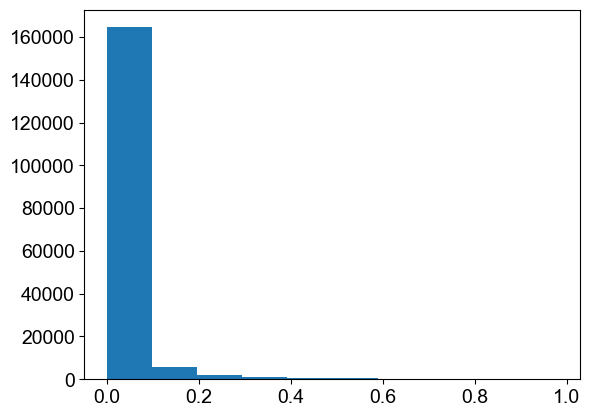

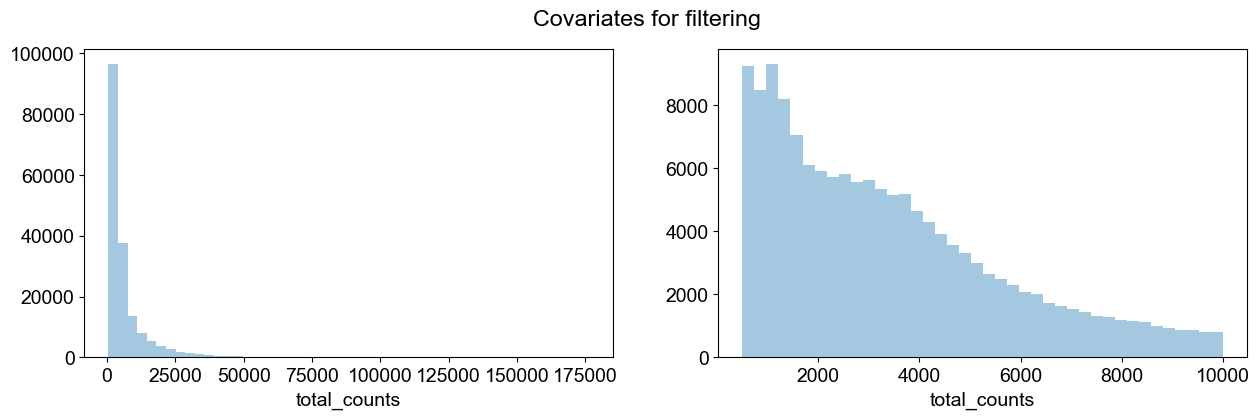

In [81]:
adata_concat = show_mito(adata_concat)
adata_concat = show_expr(adata_concat)
adata_concat = pp(adata_concat)

In [90]:
adata_concat.X

<170213x33727 sparse matrix of type '<class 'numpy.float32'>'
	with 343162905 stored elements in Compressed Sparse Row format>

In [82]:
def clu(adata, key_added="leiden-1", 
        n_neighbors=50, n_pcs=30, 
        rep='X_pca_harmony', 
        do_har=False, 
        max_iter=20, 
        do_scrublet=False, 
        har_key='batch', 
        resolution=1):
    # Computing the neighborhood graph
    if do_scrublet:
        n0 = adata.shape[0]
        print("{0} Cell number: {1}".format(key_added, n0))
        sc.external.pp.scrublet(adata)
        adata = adata[adata.obs['predicted_doublet']==False,:].copy()
        print("{0} Cells retained after scrublet, {1} cells reomved.".format(adata.shape[0], n0-adata.shape[0]))
    else:
        print("Ignoring processing doublet cells...")
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    sc.pp.pca(adata, svd_solver='arpack', use_highly_variable=True)
    if do_har and len(adata.obs[har_key].cat.categories) > 1:
        sc.external.pp.harmony_integrate(adata, key=har_key,max_iter_harmony=max_iter)
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    else:
        print("Evaluating neighbors only...")
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, use_rep=rep)
    # Run UMAP
    sc.tl.umap(adata)
    sc.tl.leiden(adata, resolution=resolution, key_added=key_added)
    sc.pl.umap(adata, color=key_added, legend_fontoutline=True, palette=sc.pl.palettes.default_20, legend_loc="on data")
    return adata

Ignoring processing doublet cells...


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


2025-03-07 11:51:04,760 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-03-07 11:56:30,112 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-03-07 11:56:32,773 - harmonypy - INFO - Iteration 1 of 20
2025-03-07 11:59:11,736 - harmonypy - INFO - Iteration 2 of 20
2025-03-07 12:01:49,876 - harmonypy - INFO - Iteration 3 of 20
2025-03-07 12:04:31,108 - harmonypy - INFO - Converged after 3 iterations
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


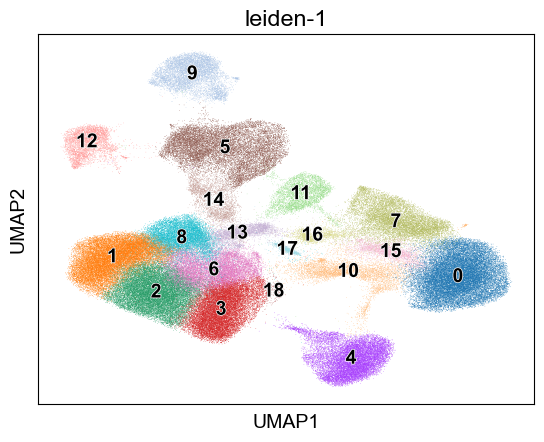

In [83]:
adata_concat = clu(adata_concat,do_har=True, do_scrublet=False)

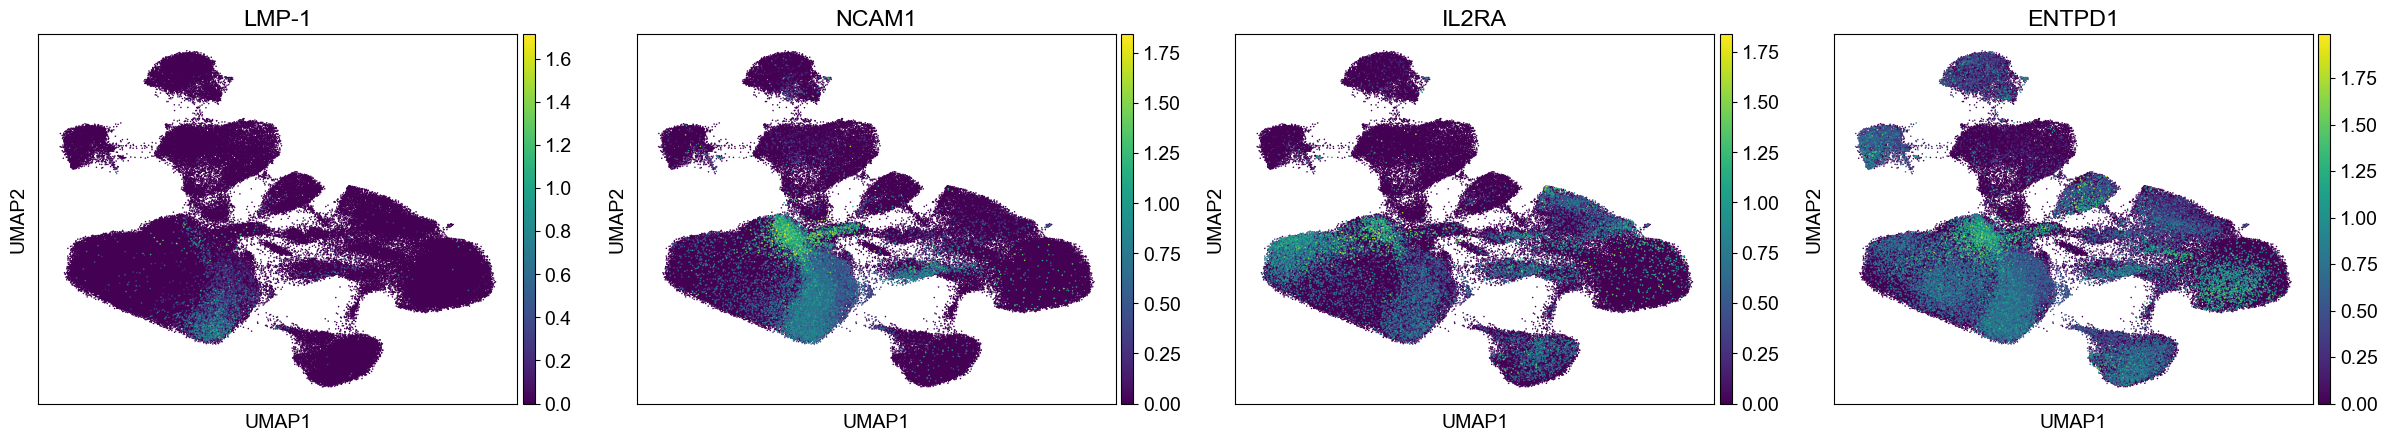

In [113]:
sc.pl.umap(adata_concat, color=['LMP-1', 'NCAM1', 'IL2RA', 'ENTPD1'], use_raw=False, size=5)

In [122]:
adata_concat.write_h5ad("/data/NKTCL/NKTCL_Multi/NKTCL-gex-3.7.h5ad")

/home/rzh/BCY/lib/python3.10/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Ignoring processing doublet cells...
Evaluating neighbors only...


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


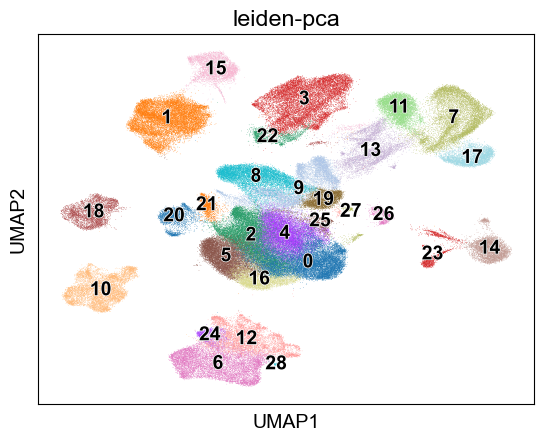

In [123]:
adata_pca = adata_concat.copy()
adata_pca = clu(adata_pca,do_har=False, do_scrublet=False, rep='X_pca', key_added='leiden-pca')

In [98]:
sc.tl.leiden(adata_concat, resolution=1.5, key_added='leiden-pca')

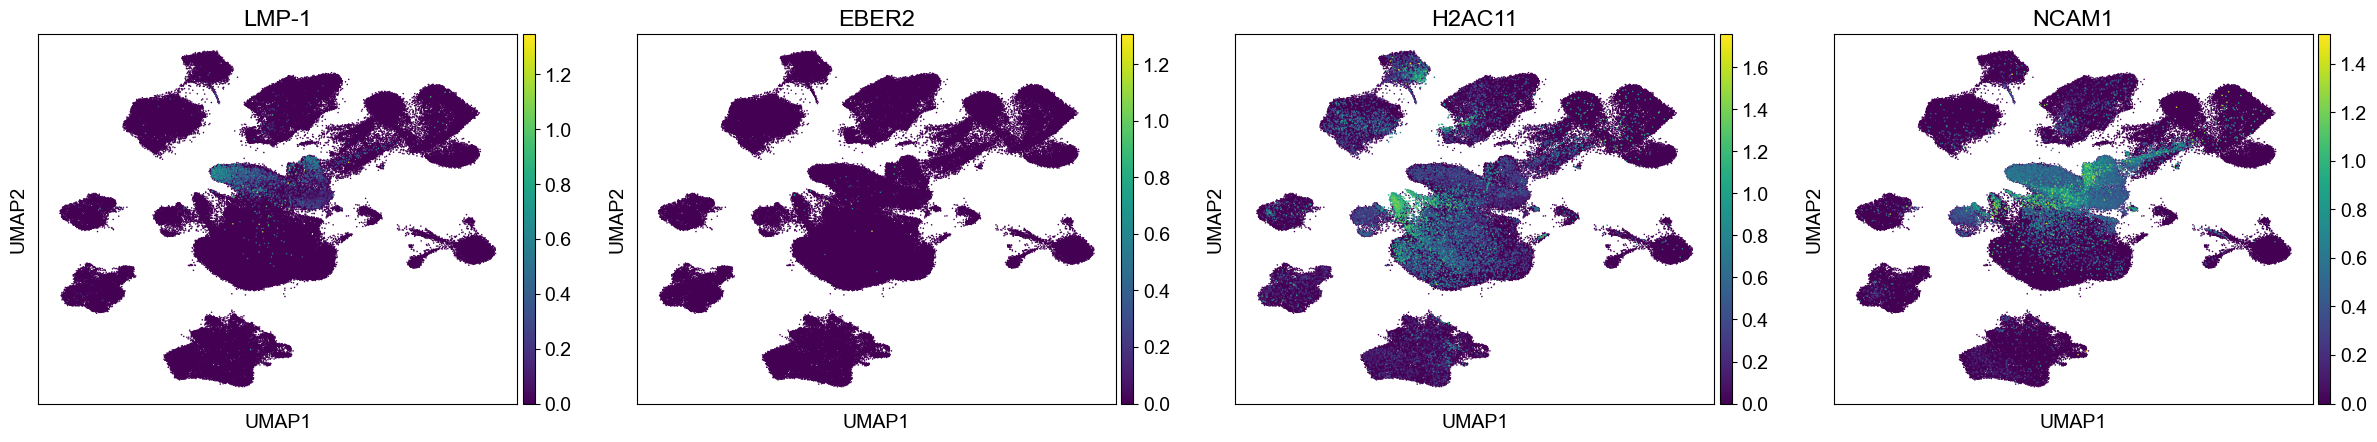

In [143]:
sc.pl.umap(adata_pca, color=['LMP-1', 'EBER2', 'H2AC11', 'NCAM1'], use_raw=False, size=5)

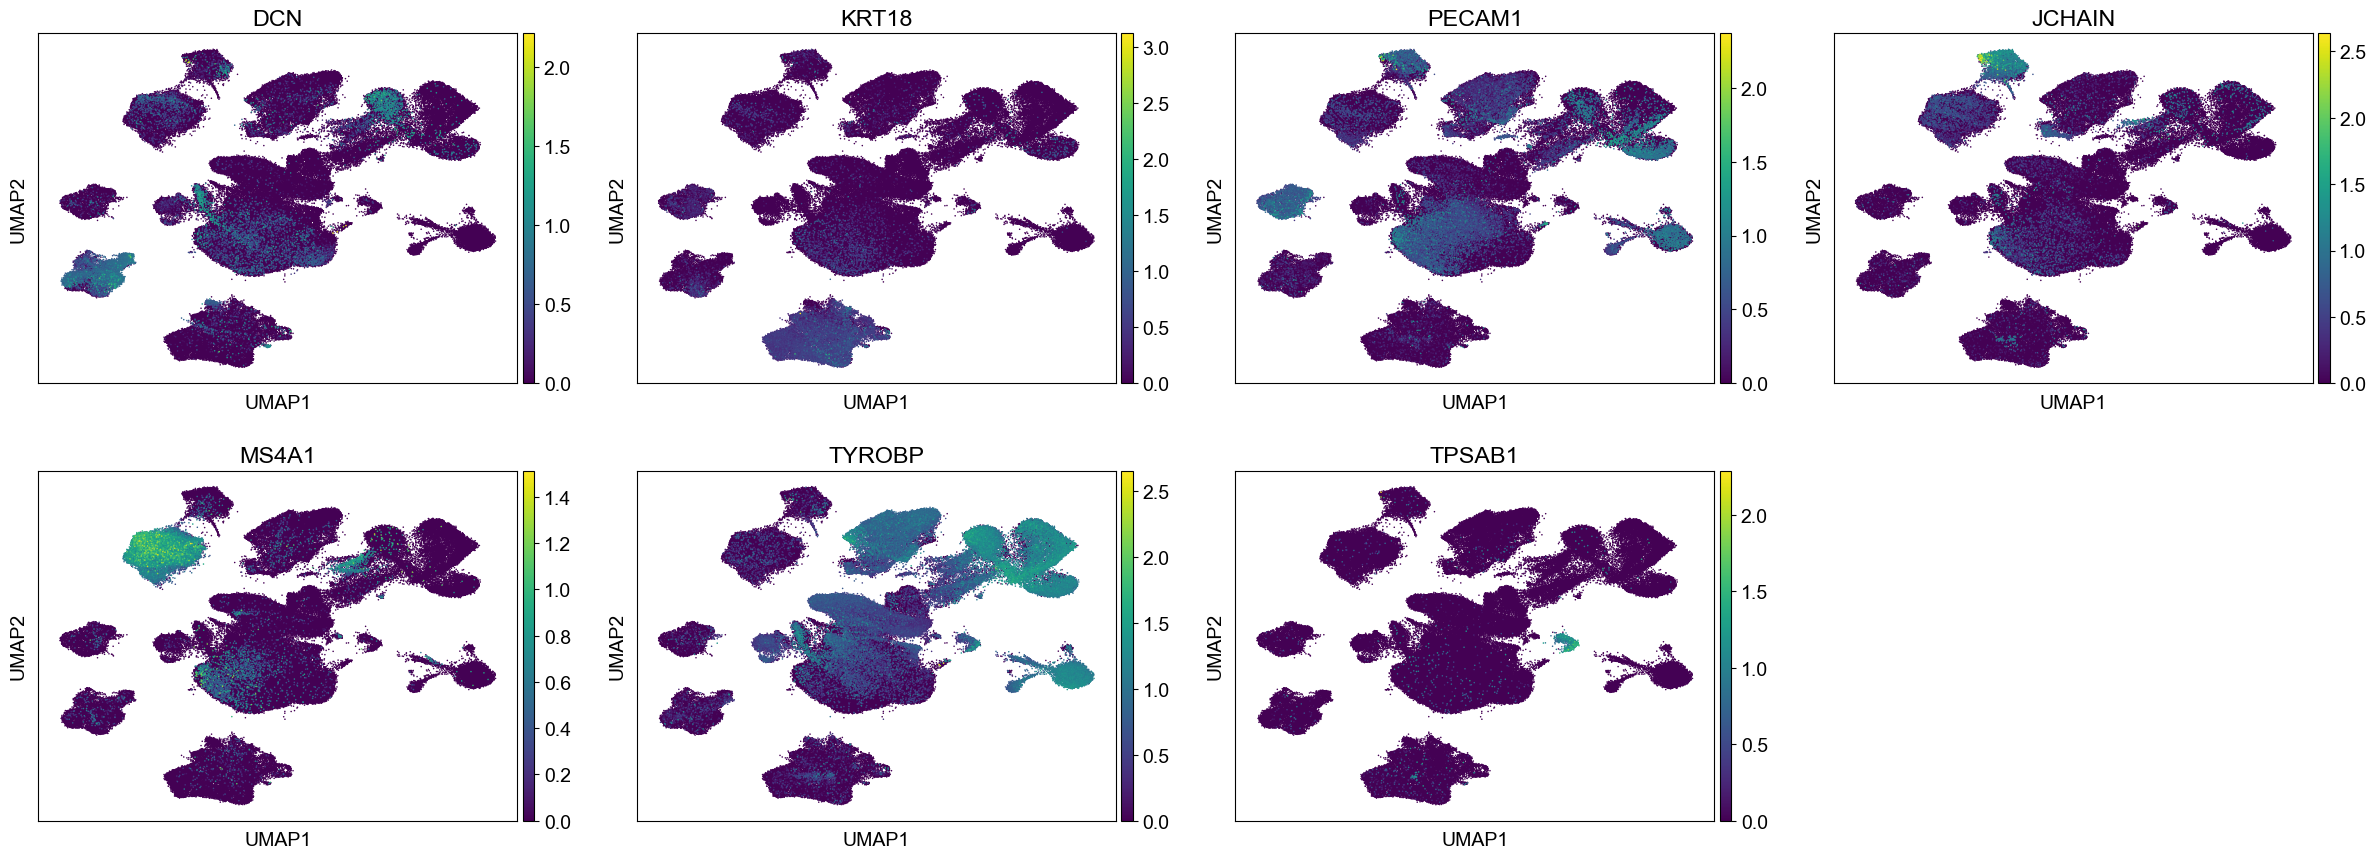

In [146]:
sc.pl.umap(adata_pca, color=['DCN', 'KRT18', 'PECAM1', 'JCHAIN', 'MS4A1', 'TYROBP', 'TPSAB1'], use_raw=False, size=5)

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


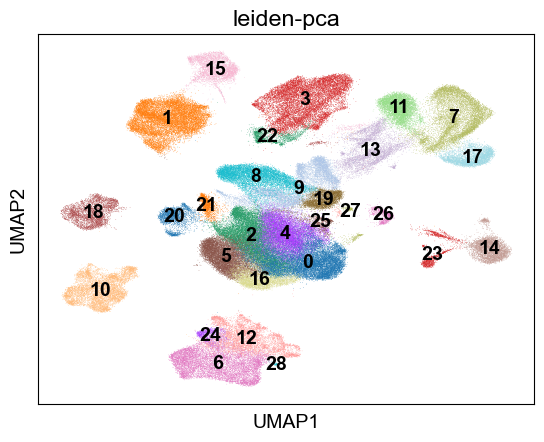

In [144]:
sc.pl.umap(adata_pca, color=['leiden-pca'], legend_loc='on data')

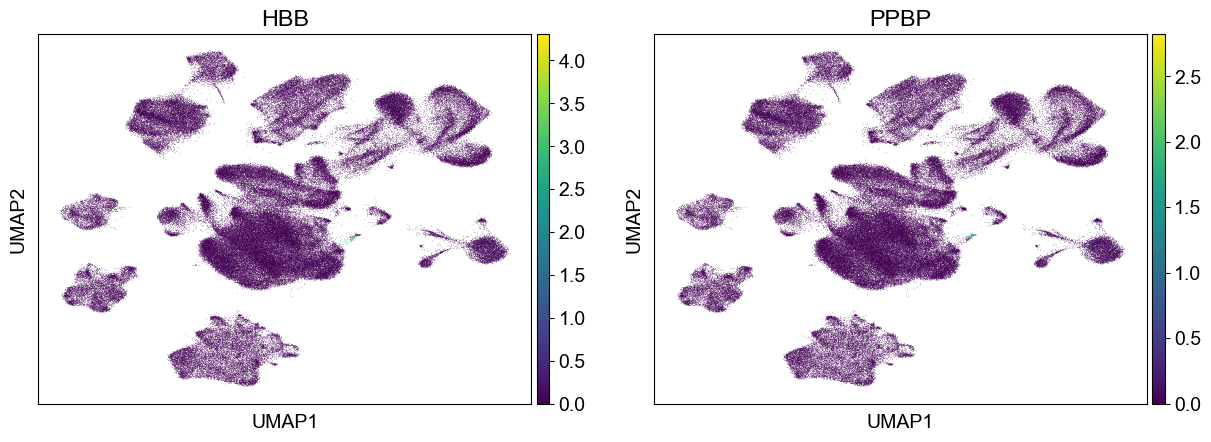

In [213]:
sc.pl.umap(adata_pca, color=['HBB', 'PPBP'])

In [148]:
def anno(adata:ad.AnnData, annoDict:dict, obsKey='cnv_status', obsVal='cnv_leiden', default="Unknown"):
  if default is not None:
    adata.obs[obsKey] = default
  for key in annoDict.keys():
    adata.obs.loc[adata.obs[obsVal].isin(annoDict[key]), obsKey] = key
  return adata

... storing 'anno-pca' as categorical
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


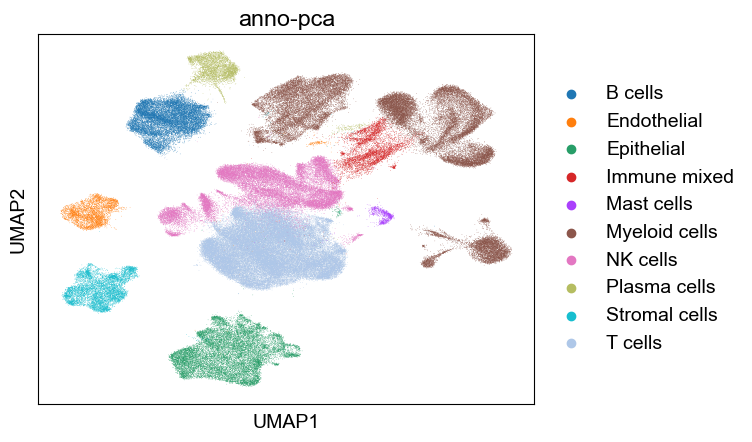

In [215]:
annot = {
  'T cells':['0', '2', '4', '5', '16', '25'],  # CD3D
  'NK cells': ['8', '9', '19', '20', '21', '27'],  # NCAM1
  'B cells': ['1'], # MS4A1
  'Plasma cells':['15'], # JCHAIN
  'Myeloid cells':['3', '7', '11', '14',  '17', '22', '23'], # TYROBP
  'Mast cells': ['26'], # TPSAB1
  'Immune mixed': ['13'],  # T,B,NK,NKT,Myeloid mixed 
  'Epithelial': ['6', '12', '24', '28'], # EPCAM
  'Endothelial': ['18'],  # PECAM1
  'Stromal cells': ['10'], # DCN, MYH11
}
adata_pca = anno(adata=adata_pca, obsKey='anno-pca', obsVal='leiden-pca', annoDict=annot)
sc.pl.umap(adata_pca, color=['anno-pca'])

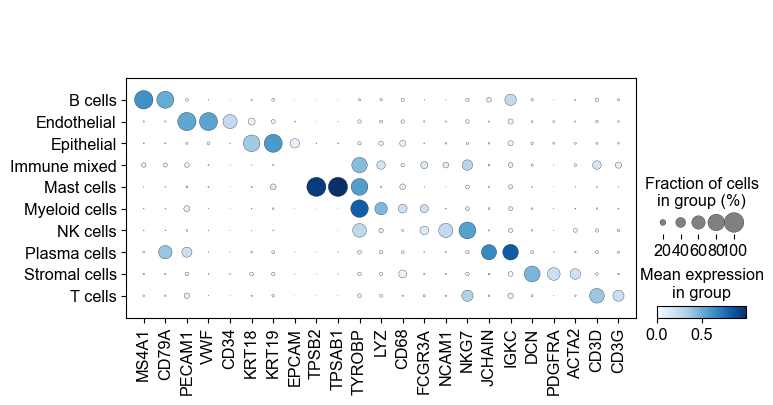

In [262]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sc.pl.dotplot(adata_concat, var_names=[
  'MS4A1', 'CD79A', 
  'PECAM1', 'VWF', 'CD34', 'KRT18', 'KRT19', 'EPCAM',
  'TPSB2', 'TPSAB1', 'TYROBP','LYZ', 'CD68',  'FCGR3A','NCAM1', 'NKG7',
  'JCHAIN','IGKC', 'DCN', 'PDGFRA', 'ACTA2', 'CD3D', 'CD3G',
], groupby='anno-pca',cmap='Blues', ax=ax)
fig.savefig(f"{figPath}/dotplot_anno-pca.svg", bbox_inches='tight')

In [267]:
adata_concat

AnnData object with n_obs × n_vars = 170213 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'cnv_status', 'cnv_score', 'LMP-1'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'anno-pca_colors', 'batch_colors', 'dendrogram_anno-pca', 'hvg', 'leiden', 'leiden-1_colors', 'leiden-pca_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap', 'cnv_status_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'Raw'
    obsp: 'connectivities', 'distances'

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


... storing 'treatment' as categorical


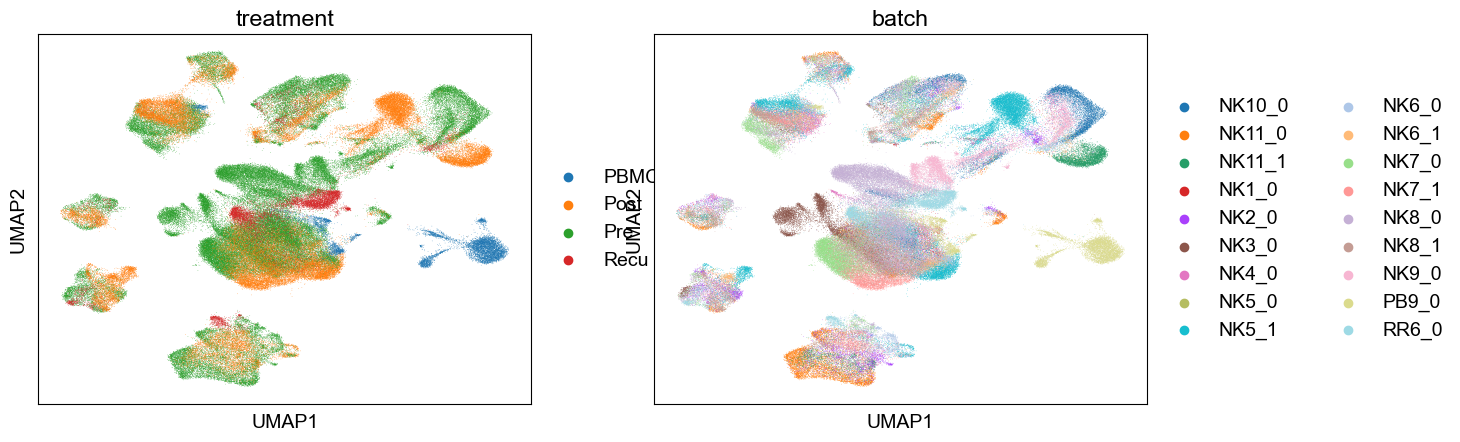

In [282]:
annot = {
  'Pre':['NK1_0', 'NK2_0', 'NK3_0', 'NK4_0','NK5_0', 
          'NK6_0','NK7_0',  'NK8_0', 'NK9_0','NK10_0','NK11_0',],  # CD3D
  'Post': ['NK5_1', 'NK6_1','NK7_1', 'NK8_1','NK11_1',],  # NCAM1
  'Recu': ['RR6_0'],
  'PBMC': ['PB9_0'], # MS4A1
}
adata_pca = anno(adata=adata_pca, obsKey='treatment', obsVal='batch', annoDict=annot)
sc.pl.umap(adata_pca, color=['treatment', 'batch'])

In [288]:
adata_pca

AnnData object with n_obs × n_vars = 170213 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden-1_colors', 'leiden-pca_colors', 'batch_colors', 'anno-pca_colors', 'treatment_colors', 'rank_genes_groups', 'dendrogram_anno-pca', 'airr:receptor_type_colors', 'airr:receptor_subtype_colors', 'airr:chain_pairing_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'Raw'
    obsp: 'distances', 'connectivities'

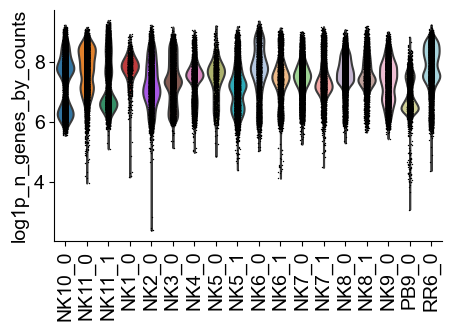

In [295]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
sc.pl.violin(adata_pca, keys=['log1p_n_genes_by_counts'], groupby='batch', ax=ax, title='',show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("")
ax.set_xticklabels(adata_pca.obs['batch'].cat.categories, rotation=90)
# ax.legend(  handletextpad=0.5, frameon=False,
#                     borderpad=0.6,
#                     columnspacing=1.3,
#                     handlelength=0.65, fontsize=12)
fig.savefig(f"{figPath}/S1d-genes.svg", dpi=400, bbox_inches='tight')

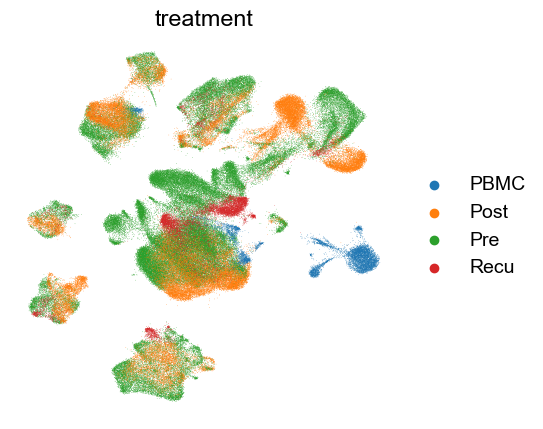

In [284]:
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.umap(adata_pca, color=['treatment'], ax=ax, show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig(f'{figPath}/S1e.png', dpi=400, bbox_inches='tight')

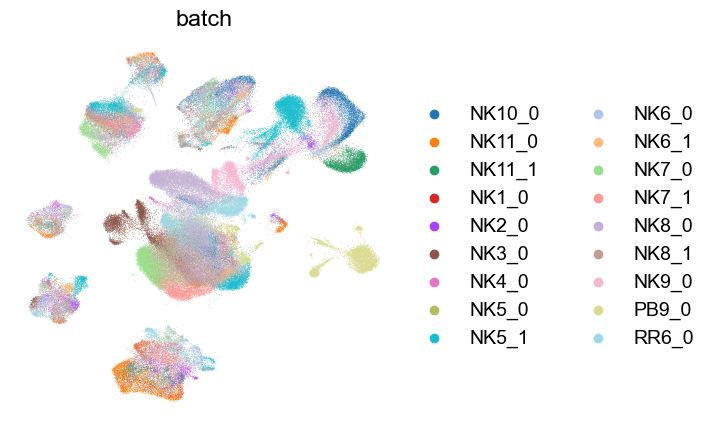

In [285]:
fig, ax = plt.subplots(figsize=(5,5))
sc.pl.umap(adata_pca, color=['batch'], ax=ax, show=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig(f'{figPath}/S1f.png', dpi=400, bbox_inches='tight')

In [153]:
sc.tl.rank_genes_groups(adata_pca, groupby='anno-pca')
sc.tl.dendrogram(adata_pca, groupby='anno-pca')


/home/rzh/BCY/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


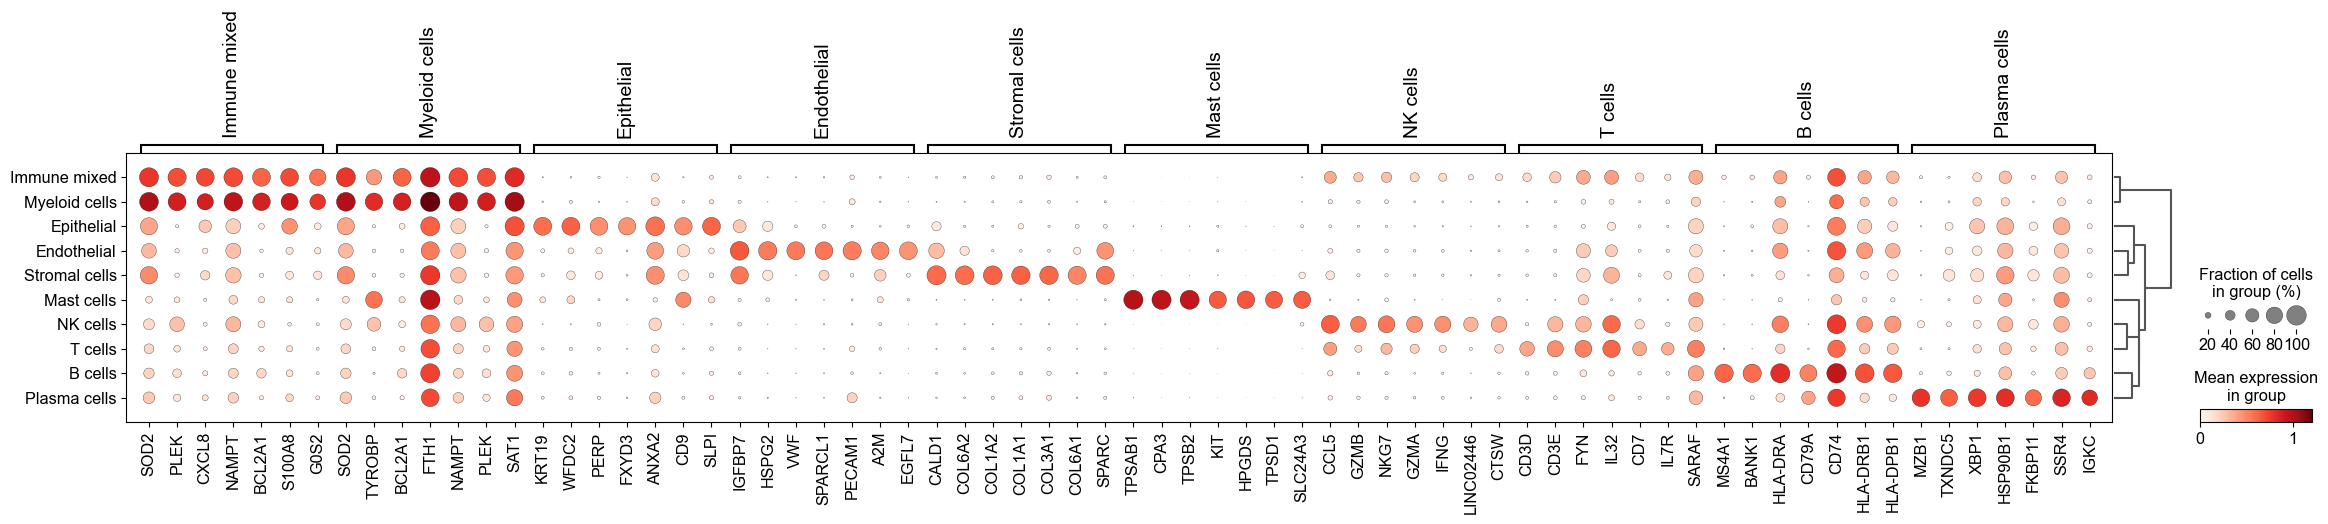

In [166]:
rp_genes = adata_pca.var_names.str.startswith('RP')
mt_genes = adata_pca.var_names.str.startswith('MT-')
adata_pca = adata_pca[:, ~(rp_genes + mt_genes)]
sc.tl.rank_genes_groups(adata_pca, groupby='anno-pca')
sc.tl.dendrogram(adata_pca, groupby='anno-pca')
sc.pl.rank_genes_groups_dotplot(adata_pca, n_genes=7, save='NKTCL_CD8Tdotplot.svg')

In [167]:
def propPlot(age_df, barlabels, ax, colors=sc.pl.palettes.default_20, xlabel='Patient ID', show_y=True, xrotate=90):
    all_df = age_df.sum(axis=1)
    age_normdf = pd.DataFrame([age_df.loc[i,:]/all_df[i] for i in barlabels], index=barlabels)
    age_cumdf = pd.DataFrame([np.cumsum(age_normdf.loc[i,:]) for i in barlabels], index=barlabels)
    norm_gdfs = age_normdf
    cum_gdfs = age_cumdf
    for i, col in enumerate(age_df.columns):
        height = norm_gdfs[col]
        starts = cum_gdfs[col] - height
        rects = ax.bar(barlabels, height, bottom=starts, width=0.9, color=colors[i], edgecolor='white', linewidth=0.5,
                        label=col, alpha=1)
    
        # ax.bar_label(rects,age_df.loc[:, col], label_type='center', color='lightgrey', fontsize=14)
    ax.legend( bbox_to_anchor=(1, -0.3), 
              handletextpad=0.5, frameon=False,
                          borderpad=0.4,
                          columnspacing=1,
                          handlelength=0.65,
              loc='lower left')
    if show_y:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.set_ylabel('Cell proportions')
    else:
        ax.yaxis.set_visible(False)
        ax.spines.left.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_xticks(barlabels)
    ax.set_xticklabels(labels=barlabels,rotation=xrotate)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)

In [168]:
adata_pca.obs['batch'].cat.categories

Index(['NK10_0', 'NK11_0', 'NK11_1', 'NK1_0', 'NK2_0', 'NK3_0', 'NK4_0',
       'NK5_0', 'NK5_1', 'NK6_0', 'NK6_1', 'NK7_0', 'NK7_1', 'NK8_0', 'NK8_1',
       'NK9_0', 'PB9_0', 'RR6_0'],
      dtype='object')

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


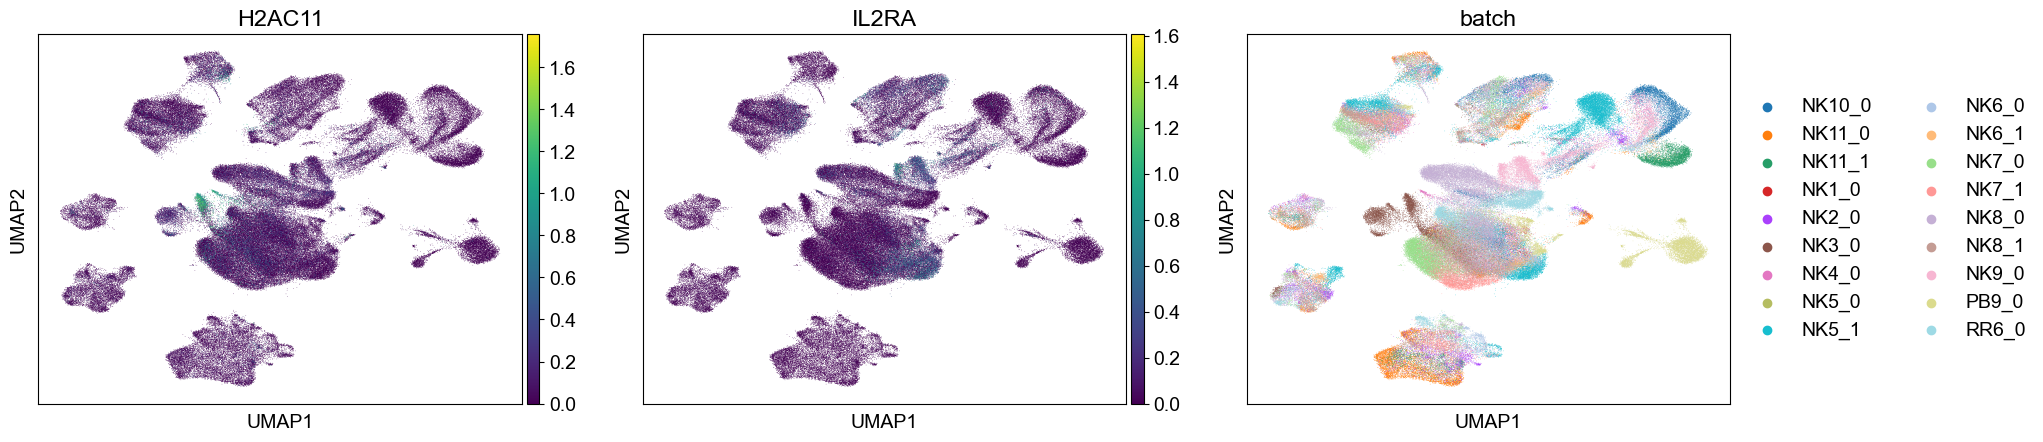

In [237]:
sc.pl.umap(adata_pca, color=['H2AC11', 'IL2RA','batch'], use_raw=False)

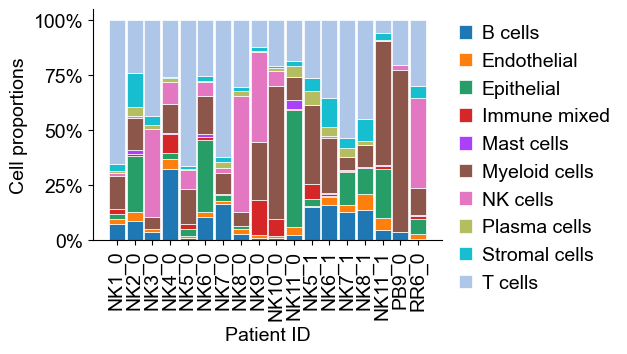

In [170]:
barlabels = [ 'NK1_0', 'NK2_0', 'NK3_0', 'NK4_0','NK5_0', 
             'NK6_0','NK7_0',  'NK8_0', 'NK9_0','NK10_0', 
             'NK11_0','NK5_1', 'NK6_1','NK7_1', 'NK8_1',
             'NK11_1', 'PB9_0', 'RR6_0']
cell_types = list(adata_pca.obs['anno-pca'].unique())
cell_types.sort()
age_df = pd.DataFrame(columns = list(cell_types))
for bar in barlabels:
    d1 = pd.DataFrame([len(adata_pca[(adata_pca.obs["anno-pca"] == ct) & (adata_pca.obs["batch"] == bar)]) for ct in list(cell_types)], index = list(cell_types), columns=[bar]).T
    age_df = pd.concat([age_df, d1])
fig0, ax0 = plt.subplots(figsize=(4.5, 3))
propPlot(age_df, ax=ax0, barlabels=barlabels)
fig0.savefig(f"{figPath}/EBV-proportions.svg",bbox_inches='tight')

In [163]:
adata_pca.layers['Raw'] = adata_raw.X.copy()
del adata_pca.raw

In [164]:
adata_pca.write_h5ad(f'/data/NKTCL/NKTCL_Multi/analysis/NKTCL-gex-EBV-3.7.h5ad')

In [ ]:

adata_concat = sc.read_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-gex-2.18.h5ad")

Load preprocessed NKTCL-gex.h5ad

In [12]:
adata_concat = sc.read_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-gex-2.18.h5ad")

Save gex to NKTCL-gex.h5ad

In [115]:
adata_concat.var_names_make_unique()
adata_concat.write_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-gex-2.18.h5ad")

### Read and merge Velocity

In [238]:
import loompy as lm
import scvelo as scv

/home/rzh/BCY/lib/python3.10/site-packages/loompy/bus_file.py:68: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def twobit_to_dna(twobit: int, size: int) -> str:
/home/rzh/BCY/lib/python3.10/site-packages/loompy/bus_file.py:85: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def dna_to_twobit(dna: str) -> int:
/home/rzh/BCY/lib/python3.10/site-packages/loompy/bus_

In [241]:
VeloPath='/data/NKTCL/NKTCL_Multi/NKTCL-velo/'
loomList = [VeloPath + v for v in os.listdir(VeloPath)]
loomList.sort()
lm.combine_faster(loomList, output_file="/data/NKTCL/NKTCL_Multi/analysis/NKTCL-velo.loom")

In [252]:
ldata = scv.read_loom('/data/NKTCL/NKTCL_Multi/analysis/NKTCL-velo.loom')

In [ ]:
lnames = ldata.obs_names
lname = [s.split(':')[1].split('x')[0]+ '-1-'+ s.split(':')[0].split('EBV_')[-1] for s in ldata.obs_names]
ldata.obs_names = lname

AnnData object with n_obs × n_vars = 175404 × 38771
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [265]:
ldata.write_h5ad("/data/NKTCL/NKTCL_Multi/analysis/NKTCL-velo-3.20.h5ad")

... storing 'Chromosome' as categorical
... storing 'Strand' as categorical


### Merge gex and ir to h5mu

In [181]:
mdata = mu.MuData({'gex': adata_pca, "airr":nktcl_ir})
mdata

MuData object with n_obs × n_vars = 170505 × 33727
  2 modalities
    gex:	170213 x 33727
      obs:	'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment'
      var:	'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden-1_colors', 'leiden-pca_colors', 'batch_colors', 'anno-pca_colors', 'treatment_colors', 'rank_genes_groups', 'dendrogram_anno-pca', 'airr:receptor_type_colors', 'airr:receptor_subtype_colors', 'airr:chain_pairing_colors'
      obsm:	'X_pca', 'X_pca_harmony', 'X_umap'
      varm:	'PCs'
      layers:	'Raw'
      obsp:	'distances', 'connectivities'
    airr:	60443 x 0
      obs:	'receptor_type', 'receptor_subtype', 'chain_pairing'
      uns:	'scirpy_version', 'chain_indices'
      obsm:	'airr', 'chain_indices'

/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/rzh/BCY/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


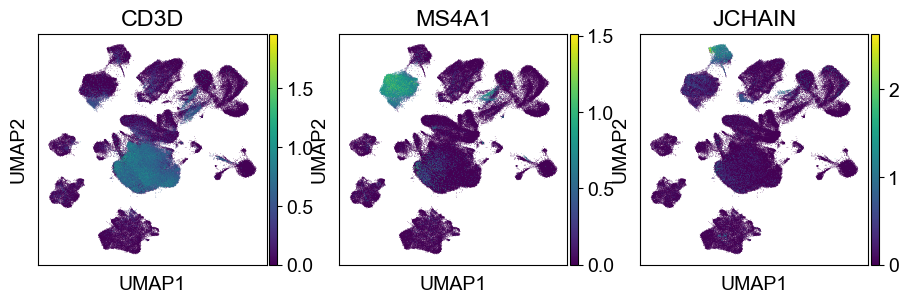

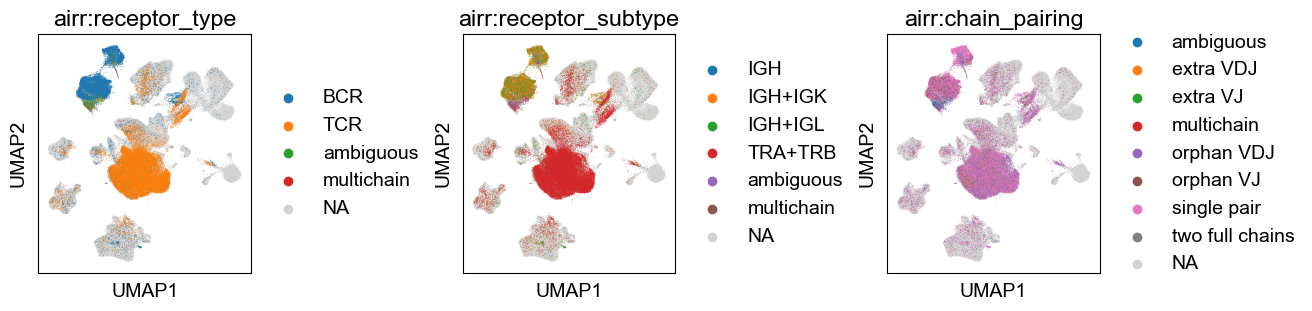

In [182]:
figsize=(11,3)

# GENE EXPRESSION OF T,B cells
fig, ax = plt.subplots(1, 3,figsize=figsize)
for i,g in enumerate(["CD3D", 'MS4A1', 'JCHAIN']):
  mu.pl.embedding(mdata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/EBV-nktcl-umap-expr.png", dpi=300, bbox_inches='tight')

# umap of TCR,BCR 
fig, ax = plt.subplots(1, 3,figsize=(13,3), constrained_layout=True)
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  mu.pl.embedding(mdata, basis="gex:umap", color=g, ax=ax[i], show=False)
  ax[i].set_xlabel("UMAP1")
  ax[i].set_ylabel("UMAP2")
fig.savefig(f"{figPath}/EBV-nktcl-umap-tbcr.png", dpi=300, bbox_inches='tight')

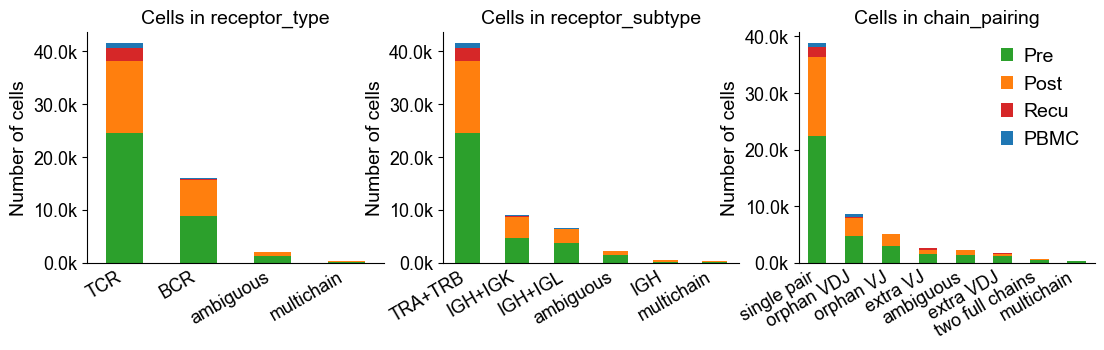

In [183]:
# abundance of TCR,BCR targeting pre/post treatment
def ks(x, pos):
    return '%1.1fk' % (x*1e-3)
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(mdata, groupby=g, 
                        target_col="gex:treatment", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
ax[2].legend(fontsize=14,
      frameon=False, handletextpad=0.5, loc="best",
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/EBV-nktcl-abundance-tbcr-treatment.svg", bbox_inches='tight')

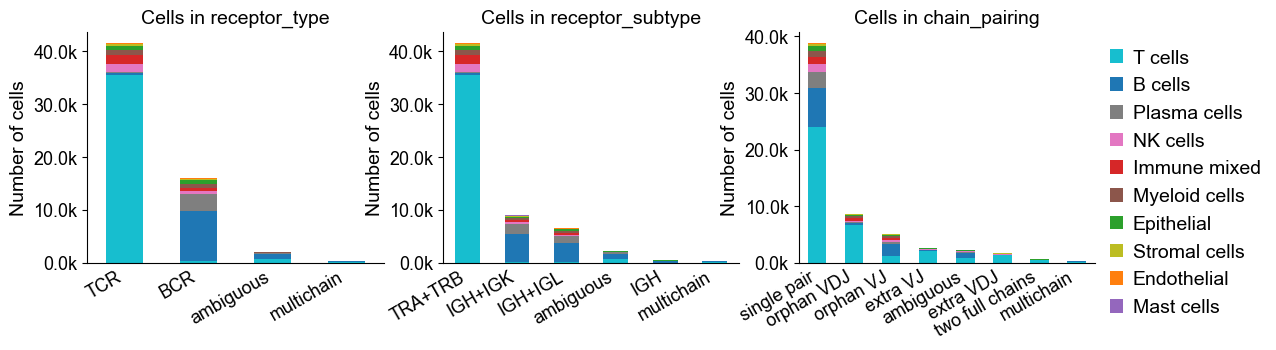

In [184]:
# abundance of TCR,BCR targeting anno-pca
def ks(x, pos):
    return '%1.1fk' % (x*1e-3)
fig, ax = plt.subplots(1, 3,figsize=(13,3))
for i,g in enumerate(["airr:receptor_type", "airr:receptor_subtype", 'airr:chain_pairing']):
  ir.pl.group_abundance(mdata, groupby=g, 
                        target_col="gex:anno-pca", 
                        ax=ax[i], 
                        style_kws={"title": "Cells in {}".format(g.split(":")[1]),
                                   "xlab": '',
                                   "title_fontsize":14, 
                                   "label_fontsize":14, 
                                   "tick_fontsize":13,
                                   "add_legend": True})
  ax[i].yaxis.set_major_formatter(FuncFormatter(ks))
  ax[i].legend().set_visible(False)
  
ax[2].legend(fontsize=14,
      frameon=False, handletextpad=0.5,bbox_to_anchor=(1, -0.3),
      loc='lower left',
              borderpad=0.3,
              columnspacing=1.3,
              handlelength=0.65,)
fig.savefig(f"{figPath}/EBV-nktcl-abundance-tbcr-anno-pca.svg", bbox_inches='tight')

### Read and merge TCR and BCR for RR sample

In [11]:
# suffix
BCRsuffix = "/vdj_b/filtered_contig_annotations.csv"
TCRsuffix = "/vdj_t/filtered_contig_annotations.csv"

VDJprefix = "/data/NKTCL/NKTCL_Multi/NKTCL-vdj/"
VDJFiles = ['RR6_0']
# bcr
nktcl_bcr = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[0]}{BCRsuffix}", filtered=True)
nktcl_bcr.obs_names = [f"{s}-{VDJFiles[0]}" for s in nktcl_bcr.obs_names]

# tcr
nktcl_tcr = ir.io.read_10x_vdj(f"{VDJprefix}{VDJFiles[0]}{TCRsuffix}", filtered=True)
nktcl_tcr.obs_names = [f"{s}-{VDJFiles[0]}" for s in nktcl_tcr.obs_names]
nktcl_ir_RR = ir.pp.merge_airr(nktcl_bcr, nktcl_tcr)
nktcl_ir_RR

/home/rzh/BCY/lib/python3.10/site-packages/anndata/utils.py:334: ExperimentalFeatureWarning: Support for Awkward Arrays is currently experimental. Behavior may change in the future. Please report any issues you may encounter!
  warnings.warn(msg, category, stacklevel=stacklevel)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

AnnData object with n_obs × n_vars = 2527 × 0
    uns: 'scirpy_version'
    obsm: 'airr'

In [ ]:
RNAprefix = '/data/NKTCL/NKTCL_Multi/NKTCL-scRNA/'
RNAFiles = ['RR6_0']
adata_RR = input_adata(f"{RNAprefix}{RNAFiles[0]}")

In [18]:
adata_RR.layers['Raw'] = adata_RR.X

In [46]:
adata_RR.var_names_make_unique()

In [29]:
adata_pre = adata_concat[adata_concat.obs['batch'].isin(['NK6_0'])]
adata_post = adata_concat[adata_concat.obs['batch'].isin(['NK6_1'])]
adata_pre.obs_names = [f"{s.split('-')[0]}-{s.split('-')[1]}" for s in adata_pre.obs_names]
adata_post.obs_names = [f"{s.split('-')[0]}-{s.split('-')[1]}" for s in adata_post.obs_names]

In [41]:
adata_pre.obs['batch'] = 'RR6_0'

In [50]:
adata_RR = adata_RR.concatenate([adata_pre, adata_post], batch_categories=['RR6_0', 'NK6_0', 'NK6_1'])
adata_RR.var = adata_pre.var[['ID', 'name', 'type']]
adata_RR

/tmp/ipykernel_3264984/2273850455.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_RR = adata_RR.concatenate([adata_pre, adata_post], batch_categories=['RR6_0', 'NK6_0', 'NK6_1'])


AnnData object with n_obs × n_vars = 19959 × 33772
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'doublet_score', 'predicted_doublet', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'cnv_status'
    var: 'ID', 'name', 'type'
    layers: 'Raw'

In [304]:
adata_Recu = adata_concat[adata_concat.obs['batch'] == 'RR6_0']

In [305]:
adata_Recu

View of AnnData object with n_obs × n_vars = 10255 × 33727
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden-1', 'leiden-pca', 'anno-pca', 'treatment', 'cnv_status', 'cnv_score', 'LMP-1'
    var: 'ID', 'name', 'type', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'anno-pca_colors', 'batch_colors', 'dendrogram_anno-pca', 'hvg', 'leiden', 'leiden-1_colors', 'leiden-pca_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'treatment_colors', 'umap', 'cnv_status_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'Raw'
    obsp: 'connectivities', 'distances'

Exception ignored in: <function _xla_gc_callback at 0x7f27d2bd23b0>
Traceback (most recent call last):
  File "/home/rzh/BCY/lib/python3.10/site-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


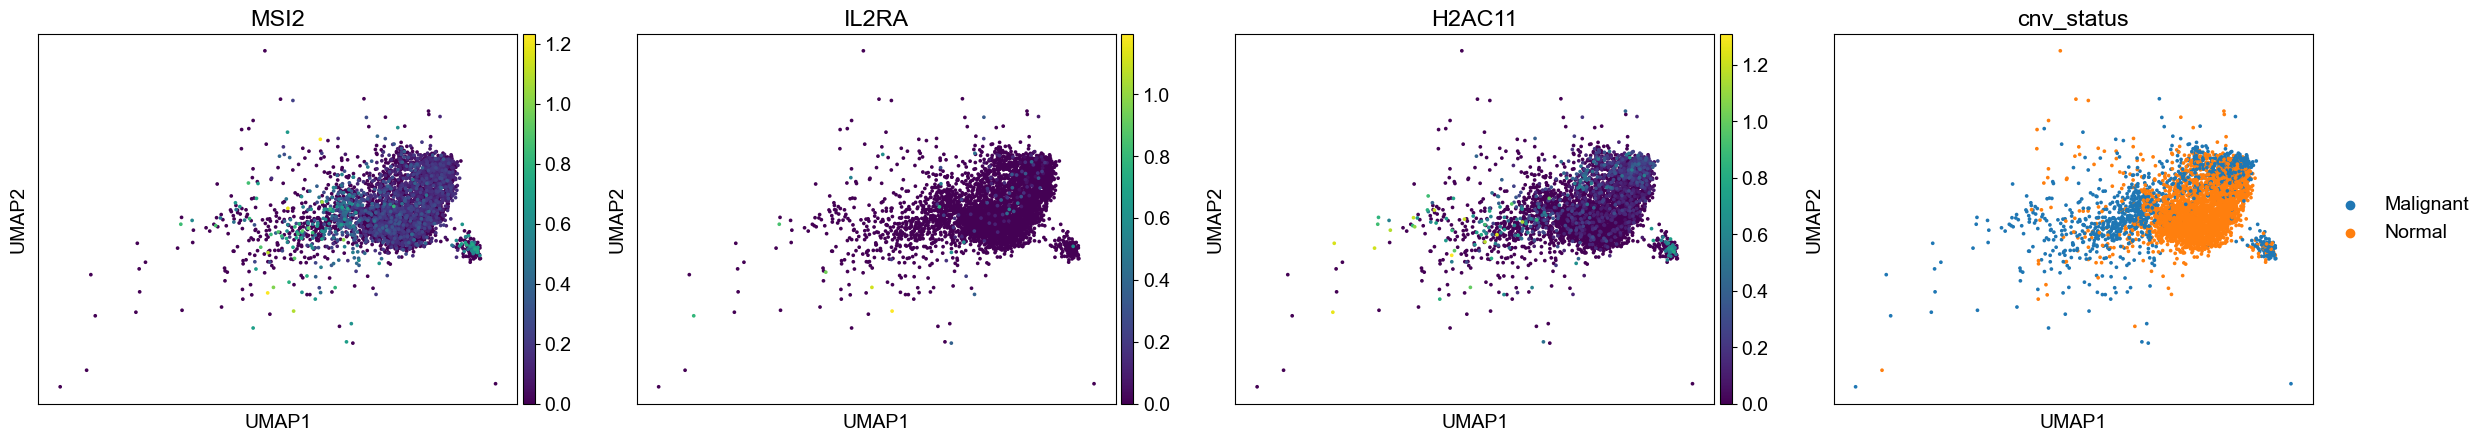

In [306]:
sc.pl.umap(adata_Recu[adata_Recu.obs['anno-pca'] == 'NK cells'], color=['MSI2', 'IL2RA', 'H2AC11', 'cnv_status'])